# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [39]:
# Your code here. 

student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [40]:
student_data.head(10)

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

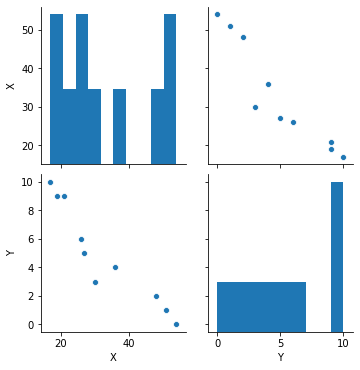

In [41]:
# Your code here.

sns.pairplot(student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [42]:
#Vemos una correlación negativa entre ambas variables que parece bastante clara

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [43]:
correlacion = student_data["X"].corr(student_data["Y"])

correlacion

-0.9391626886887122

In [44]:
covarianza = student_data["X"].cov(student_data["Y"])

covarianza

-45.56666666666666

In [45]:
#Parece ser que hay una correlación bastante alta

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [46]:
# Uso la regresión lineal, que es la única que sé ;)

model = LinearRegression()

In [47]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#Ahora creo la X y la Y

In [86]:
x = student_data[["X"]]

In [87]:
y = student_data["Y"]

In [88]:
x

,X
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


In [89]:
y

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: Y, dtype: int64

In [90]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
model.score(x,y)

0.8820265558250109

Plot your regression model on your scatter plot.

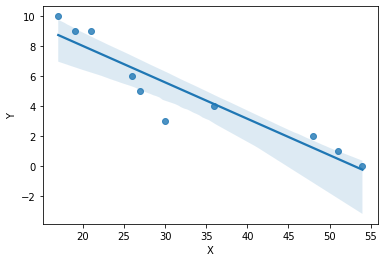

In [92]:
#Como tengo pocos datos, hago la regresión en la visualización del lin regression

sns.regplot(x = "X", y = "Y", data = student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

#Parece ser que la regresión es clara, además antes la correlación te ha dado de 0.93

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [55]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")

In [56]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [65]:
# Your response here. 

vehicles2 = vehicles.filter(["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"], axis = 1)

In [66]:
vehicles2.head()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550


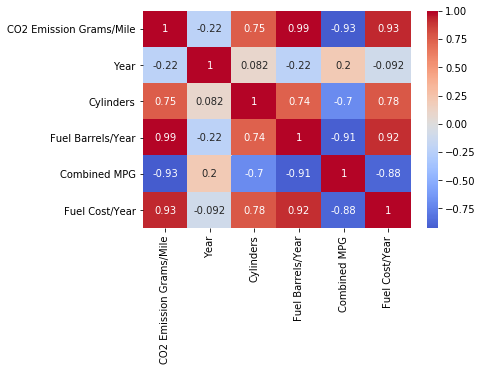

In [67]:
#Hacemos un heatmap para ver las correlaciones entre las variables:

sns.heatmap(vehicles2.corr(), cmap = "coolwarm", annot = True, center = 0)

In [ ]:
#La variable que creo que mejor explica es Fuel Barrels per year, ya que da un 0.99

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

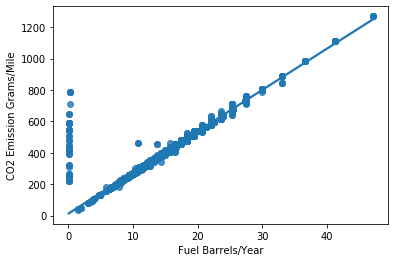

In [70]:
#Empiezo haciendo una visualización de estas dos variables en particular:

sns.regplot(x = "Fuel Barrels/Year", y = "CO2 Emission Grams/Mile", data = vehicles2)

In [71]:
model = LinearRegression()

In [72]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
x = vehicles2[["Fuel Barrels/Year"]]

In [79]:
x

,Fuel Barrels/Year
0,19.388824
1,25.354615
2,20.600625
3,25.354615
4,20.600625
...,...
35947,9.155833
35948,9.155833
35949,9.155833
35950,9.155833


In [82]:
y = vehicles2["CO2 Emission Grams/Mile"]

In [83]:
y

0        522.764706
1        683.615385
2        555.437500
3        683.615385
4        555.437500
            ...    
35947    244.000000
35948    243.000000
35949    244.000000
35950    246.000000
35951    255.000000
Name: CO2 Emission Grams/Mile, Length: 35952, dtype: float64

In [84]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model.score(x,y)

0.9725680773391494

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

#ers raro, me sale un porcentaje de correlación más bajo cuando hago el entreno

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [96]:
# Your code here. 

party = pd.DataFrame({'People': [1, 3, 4, 6, 8, 9, 11, 14], 'Attendees': [1, 2, 4, 4, 5, 7, 8, 13]})

In [97]:
party.head()

,People,Attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

sns.regplot()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 